## I. Introduction

This weeks analysis is on flight data, with additional details available on airlines and airports in their respective csv's. In particular we are interested in answering questions about the actual arrival time compared to the flights scheduled arrival time. The particular column in our flight data that corresponds to this as a calculated value is the arrival delay column which shows the time early (negative) to late (positive) that a flight is. Additionally we will need to handle the missing values still present in the dataset, and I am choosing to use the dataset that has not yet been cleaned to practice data preparation as well.

The datasets for this week are split across four csv's: flights.csv, airlines.csv, airports.csv, and flights_cleaned.csv. I will not be using the flights_cleaned.csv for my analysis, but it would put our data in a state where there are fewer columns to contend with, as well as the first round of missing data will have been dealt with.

## II. Methods/Code, III. Results/Output, IV. Analysis of Results

### Setup
---

We will be starting our analysis by importing the python packages that we will leverage for our analysis.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

Let's start by looking at what each of these csv's look like.

In [2]:
!head assign_wk2/airlines.csv

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.


In [3]:
!head assign_wk2/airports.csv

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717


In [4]:
!head assign_wk2/flights.csv

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,,,,,,
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,12,0014,280,279,263,2330,0737,4,0750,0741,-9,0,0,,,,,,
2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,16,0034,286,293,266,2296,0800,11,0806,0811,5,0,0,,,,,,
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,15,0030,285,281,258,2342,0748,8,0805,0756,-9,0,0,,,,,,
2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,11,0035,235,215,199,1448,0254,5,0320,0259,-21,0,0,,,,,,
2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,0020,-5,18,0038,217,230,206,1589,0604,6,0602,0610,8,0,0,,,,

It looks like we have headers in our first row, so we don't have to define our columns before importing into a dataframe.

In [5]:
# airlines.csv fields --> IATA_CODE::AIRLINE

airlines_df = pd.read_csv('assign_wk2/airlines.csv')
airlines_df.head(10)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


It looks like our airlines.csv dataset is a mapping of our IATA code to the airlines name. This will be useful for producing a more readable analysis when presenting, but is unlikely to provide useful information for our delay analysis.

In [7]:
# airports.csv fields --> IATA_CODE::AIRPORT::CITY::STATE::COUNTRY::LATITUDE::LONGITUDE

airports_df = pd.read_csv('assign_wk2/airports.csv')
airports_df.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [8]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


The airports.csv is a list of demographic details about 322 airports with a few missing values in latitude and longitude, so if we end up using this dataset we will need to figure what we want to do with the missing values.

In [9]:
# flights.csv fields --> YEAR::MONTH::DAY::DAY_OF_WEEK::AIRLINE::FLIGHT_NUMBER::TAIL_NUMBER::
# ORIGIN_AIRPORT::DESTINATION_AIRPORT::SCHEDULED_DEPARTURE::ARRIVAL_TIME::ARRIVAL_DELAY::DIVERTED::
# CANCELLED::CANCELLATION_REASON::AIR_SYSTEM_DELAY::SECURITY_DELAY::AIRLINE_DELAY::
# LATE_AIRCRAFT_DELAY::WEATHER_DELAY

flights_df = pd.read_csv('assign_wk2/flights.csv', low_memory=False)
flights_df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [11]:
flights_df['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

This is interesting, it looks like we have 628 different origin airports in our dataset but only have 322 mappings in our airports.csv dataset. It turns out that this is because our origin airports column actually has two different types of identifiers in it. The first is the IATA codes which are in our airports.csv, but the second is numbers that act as identifiers for regional and private airports. We can keep that in mind in our analysis.

### Handling Missing Values
---

The first thing that we need to do with our cleaned flights data is determine where our NA/null values are so that we can determine what to do about them.

In [12]:
# show using my preferred method (isna/isnull) and showing only the relevant data (column)

flights_df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Now we will take a look at what percent of the records have missing values for each column that has missing values.

In [13]:
# show the percent of records that are missing the elapsed_time
total_flights = flights_df.shape[0]

flights_df['TAIL_NUMBER'].isnull().sum()/total_flights*100

0.2529781774744766

In [14]:
flights_df['DEPARTURE_TIME'].isnull().sum()/total_flights*100

1.4805263857046793

In [15]:
flights_df['DEPARTURE_DELAY'].isnull().sum()/total_flights*100

1.4805263857046793

In [16]:
flights_df['TAXI_OUT'].isnull().sum()/total_flights*100

1.5302593417274453

In [17]:
flights_df['WHEELS_OFF'].isnull().sum()/total_flights*100

1.5302593417274453

In [18]:
flights_df['SCHEDULED_TIME'].isnull().sum()/total_flights*100

0.00010310910025452482

In [19]:
flights_df['ELAPSED_TIME'].isnull().sum()/total_flights*100

1.8056293788071962

In [20]:
flights_df['AIR_TIME'].isnull().sum()/total_flights*100

1.8056293788071962

In [21]:
flights_df['WHEELS_ON'].isnull().sum()/total_flights*100

1.5898220319744756

In [22]:
flights_df['TAXI_IN'].isnull().sum()/total_flights*100

1.5898220319744756

In [23]:
flights_df['ARRIVAL_TIME'].isnull().sum()/total_flights*100

1.5898220319744756

In [24]:
flights_df['ARRIVAL_DELAY'].isnull().sum()/total_flights*100

1.8056293788071962

In [25]:
flights_df['CANCELLATION_REASON'].isnull().sum()/total_flights*100

98.45535693878705

In [26]:
flights_df['AIR_SYSTEM_DELAY'].isnull().sum()/total_flights*100

81.72496025573807

In [27]:
flights_df['SECURITY_DELAY'].isnull().sum()/total_flights*100

81.72496025573807

In [28]:
flights_df['AIRLINE_DELAY'].isnull().sum()/total_flights*100

81.72496025573807

In [29]:
flights_df['LATE_AIRCRAFT_DELAY'].isnull().sum()/total_flights*100

81.72496025573807

In [30]:
flights_df['WEATHER_DELAY'].isnull().sum()/total_flights*100

81.72496025573807

The flights.csv appears to have 18 columns with null/NaN/NA values in them, which we will have to address before we can continue with our analysis. My guess is that we can clean up our delay reasons, cancellation reasons and start seeing what we need to fill or drop from there.

In [31]:
flights_df['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [32]:
flights_df[flights_df['CANCELLATION_REASON'].isnull()]['CANCELLED'].value_counts()

0    5729195
Name: CANCELLED, dtype: int64

In [33]:
flights_df['CANCELLED'].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

It appears that the CANCELLATION_REASON column adds categorization to the CANCELLED column, without a data dictionary extrapolating on the meanings of these categories there is no additional information to be gained from this column and it can be removed.

In [34]:
flights_df.drop(columns=['CANCELLATION_REASON'], inplace=True)
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN


The next big offender is the specific delay columns. We will start by taking a look at what kind of values are in here and see if we can figure out a plan of action on cleaning them up.

In [35]:
flights_df['AIR_SYSTEM_DELAY'].value_counts()

0.0      498613
1.0       28003
15.0      23199
2.0       22981
3.0       21446
          ...  
518.0         1
578.0         1
453.0         1
872.0         1
477.0         1
Name: AIR_SYSTEM_DELAY, Length: 570, dtype: int64

In [36]:
flights_df['SECURITY_DELAY'].value_counts()

0.0      1059955
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
214.0          1
196.0          1
256.0          1
110.0          1
105.0          1
Name: SECURITY_DELAY, Length: 154, dtype: int64

In [37]:
flights_df['AIRLINE_DELAY'].value_counts()

0.0       493417
1.0        21319
2.0        21211
3.0        20656
4.0        20184
           ...  
965.0          1
1160.0         1
918.0          1
823.0          1
1636.0         1
Name: AIRLINE_DELAY, Length: 1067, dtype: int64

In [38]:
flights_df['LATE_AIRCRAFT_DELAY'].value_counts()

0.0      506486
15.0      14522
16.0      13824
17.0      12908
18.0      12259
          ...  
491.0         1
640.0         1
526.0         1
704.0         1
558.0         1
Name: LATE_AIRCRAFT_DELAY, Length: 695, dtype: int64

In [39]:
flights_df['WEATHER_DELAY'].value_counts()

0.0      998723
6.0        1649
8.0        1580
7.0        1537
10.0       1498
          ...  
386.0         1
692.0         1
563.0         1
460.0         1
793.0         1
Name: WEATHER_DELAY, Length: 632, dtype: int64

It appears that our NaN values are likely to be equivalent to a delay time of zero, below I will fill with zero's and see if the sum of the various delays is equal to our arrival delay when a flight arrives late.

In [40]:
delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_df[delay_cols] = flights_df[delay_cols].fillna(0)
flights_df[delay_cols].value_counts()

AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0.0               0.0             0.0            0.0                  0.0              4755640
15.0              0.0             0.0            0.0                  0.0                14074
16.0              0.0             0.0            0.0                  0.0                12735
17.0              0.0             0.0            0.0                  0.0                11146
18.0              0.0             0.0            0.0                  0.0                10235
                                                                                        ...   
12.0              0.0             17.0           66.0                 0.0                    1
                                                 58.0                 0.0                    1
                                                 53.0                 0.0                    1
                                                 49.0        

In [41]:
cols = ['ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_df[cols].sort_values('ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
337720,1971.0,0.0,0.0,1971.0,0.0,0.0
3412085,1898.0,20.0,0.0,1878.0,0.0,0.0
4103531,1665.0,0.0,0.0,1665.0,0.0,0.0
5279939,1638.0,7.0,0.0,1631.0,0.0,0.0
3100911,1636.0,11.0,0.0,1625.0,0.0,0.0
...,...,...,...,...,...,...
5818157,NaN,0.0,0.0,0.0,0.0,0.0
5818160,NaN,0.0,0.0,0.0,0.0,0.0
5818318,NaN,0.0,0.0,0.0,0.0,0.0
5818777,NaN,0.0,0.0,0.0,0.0,0.0


This confirms that our arrival delay for late flights is equal to the sum of delays in these last rows. We also see that we will need to impute the NaN's for our arrival delay column for flights that were not late (this is also in the instructions for this assignment). Additionally, it looks like all of our analysis is focused on delayed flights, normal flights, or arriving early flights.  With this information we can further clean up our dataframe by removing all cancelled and diverted flights since they will not resolve to a gate to gate value from the origin to the destination. There is another option for diverted flights, which would be to fill their missing values with the average values of each column from origin to destination by that airline but I think that we dropping the diverted flights is more fair to the spirit of what we are trying to analyze.

In [42]:
flights_df = flights_df[flights_df['CANCELLED'] != 1]
flights_df = flights_df[flights_df['DIVERTED'] != 1]
flights_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

After dropping rows for records that were cancelled flights or diverted flights, and having filled the NaN's for delay types it looks like we now have a dataset without nulls! Now that we have a clean set of data we can now start answering the questions for this weeks assignment.

### Question 1

---

- **Is the distribution of delayed flights normally distributed.**

There are a couple of different ways to determine the distribution of a dataset and it is usually a good starting point to graph the data on a histogram to see what we are looking at.

<AxesSubplot:ylabel='Frequency'>

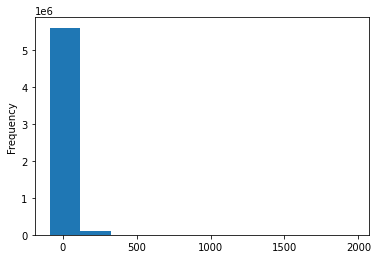

In [43]:
flights_arrival_delay_df = flights_df['ARRIVAL_DELAY']
flights_arrival_delay_df.plot.hist()

Our arrival delay values are clustered around zero which makes sense, but we have a big skew to the right which makes me pretty sure that this dataset is not normally distributed with a first visual assessment. We will test visual again later with a QQ-plot, but first lets also add in a statistical test.

In [44]:
flights_arrival_delay_df.describe()

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [45]:
# I wrote a hypothesis test function for normal distribution using
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# as inspiration

def test_normal_dist(df):
    alpha = 1e-3
    k, p = stats.normaltest(df)
    if (p<alpha):
        return 'Reject null hypothesis, evidence suggests distribution is not normal'
    else:
        return 'Unable to reject the null hypothesis, evidence suggests distribution is normal'

test_normal_dist(flights_arrival_delay_df)

'Reject null hypothesis, evidence suggests distribution is not normal'

After using our scipy normaltest method it looks the evidence supports our first visual test of the data that our dataset is not normal.

- **Describe the shape of the distribution based on the QQ-plot.**

((array([-5.16331582, -4.99482102, -4.90402599, ...,  4.90402599,
          4.99482102,  5.16331582]),
  array([ -87.,  -87.,  -82., ..., 1665., 1898., 1971.])),
 (29.686084905788938, 4.407057357987587, 0.7559225053782046))

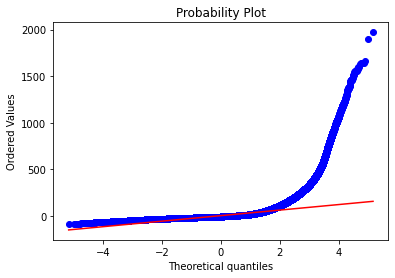

In [46]:
stats.probplot(flights_arrival_delay_df, plot=sns.mpl.pyplot)

Our QQ-plot further shows both skew, and lack of normal distribution in the dataset.

### Question 2

---

- **What is the probablity a flight leaving from a given airport will arrive at its destination late?**

The plan for determining this probability will be to determine how many total flights, then find the number of flights that arrived late from each airport, and finally divide the number late for each airport by the total flights.

For this calculation we need to keep in mind our probability formula:
$ Probability(Outcome) = Events(Outcome)/Events(Total)$

In [47]:
airport_delay_df = flights_df[['ORIGIN_AIRPORT', 'ARRIVAL_DELAY']]
airport_delay_df

,ORIGIN_AIRPORT,ARRIVAL_DELAY
0,ANC,-22.0
1,LAX,-9.0
2,SFO,5.0
3,LAX,-9.0
4,SEA,-21.0
...,...,...
5819074,LAX,-26.0
5819075,JFK,-16.0
5819076,JFK,-8.0
5819077,MCO,-10.0


Lets make new dataframes and merge in new columns, this will help us in the longterm for later questions.

In [48]:
flights_count_by_airport = airport_delay_df.groupby('ORIGIN_AIRPORT').count()
flights_count_by_airport.rename(columns={'ARRIVAL_DELAY':'TOTAL'}, inplace=True)

In [49]:
delayed_flights_count_by_airport = airport_delay_df[airport_delay_df['ARRIVAL_DELAY'] > 0].groupby('ORIGIN_AIRPORT').count()
delayed_flights_count_by_airport.rename(columns={'ARRIVAL_DELAY':'DELAYED'}, inplace=True)

In [50]:
airport_delay_prob_df = pd.merge(flights_count_by_airport, delayed_flights_count_by_airport, on='ORIGIN_AIRPORT')
airport_delay_prob_df

,TOTAL,DELAYED
ORIGIN_AIRPORT,,
10135,239,88
10136,192,32
10140,1805,601
10141,70,29
10146,86,38
...,...,...
WRG,649,236
WYS,208,58
XNA,8963,3727


We can use this dataset for proportion later, but for probability we have to remember that our formula is the total number of events with our outcome (delayed from origin airport) divided by all events.

In [51]:
count_all_flights = len(airport_delay_df)

In [52]:
airport_delay_prob_df['DELAY_PROB'] = airport_delay_prob_df['DELAYED'] / count_all_flights
airport_delay_prob_df.sort_values('DELAY_PROB', ascending=False)

,TOTAL,DELAYED,DELAY_PROB
ORIGIN_AIRPORT,,,
ATL,343506,114872,2.010358e-02
ORD,276554,113281,1.982514e-02
DFW,232647,93054,1.628524e-02
DEN,193402,80756,1.413299e-02
LAX,192003,79661,1.394135e-02
...,...,...,...
15041,60,4,7.000340e-07
15497,14,4,7.000340e-07
13502,6,2,3.500170e-07


In [53]:
airport_delay_prob_df['DELAY_PROB'].describe()

count    6.280000e+02
mean     5.815678e-04
std      1.974648e-03
min      1.750085e-07
25%      1.115679e-05
50%      5.048995e-05
75%      2.435681e-04
max      2.010358e-02
Name: DELAY_PROB, dtype: float64

The airport delay prob dataframe now contains a column with the calculated probability of a delayed arrival based on origin airport.

### Question 3
---
- **Determine the originaing airport with the largest proportion of flights arriving late to their destination. Do the same for the airport with the smallest proportion.**

Now we are going to take a look at the proportion of flights from each origin airport and how likely a flight originating from them to have arrived late. We can start getting an idea of what our numbers might look like by determining how many total flights were delayed proportional to the number of flights.

We should also do some sanity checks real quick on what the total number of flights are and the number that are delayed.

In [54]:
airport_delay_df[airport_delay_df['ARRIVAL_DELAY'] > 0].count()['ARRIVAL_DELAY']

2086896

In [55]:
airport_delay_df['ARRIVAL_DELAY'].count()

5714008

In [56]:
airport_delay_df[airport_delay_df['ARRIVAL_DELAY'] > 0].count()['ARRIVAL_DELAY'] / airport_delay_df['ARRIVAL_DELAY'].count()

0.36522454991312575

Ouch! It looks like more than 36% of flights arrive late according to this calculation. This means that when we are sanity checking our results we should expect our central tendency to be in this area, with some variation based on the bucketing that we are doing.

In [57]:
airport_delay_prob_df['DELAY_PROP'] = airport_delay_prob_df['DELAYED'] / airport_delay_prob_df['TOTAL']

In [58]:
airport_delay_prob_df.sort_values('DELAY_PROP', ascending=False).head(3)

,TOTAL,DELAYED,DELAY_PROB,DELAY_PROP
ORIGIN_AIRPORT,,,,
14222,9,8,0.000001,0.888889
GST,76,51,0.000009,0.671053
ADK,88,56,0.000010,0.636364


In [59]:
airport_delay_prob_df.sort_values('DELAY_PROP', ascending=False).tail(3)

,TOTAL,DELAYED,DELAY_PROB,DELAY_PROP
ORIGIN_AIRPORT,,,,
15041,60,4,7.000340e-07,0.066667
CNY,205,8,1.400068e-06,0.039024
10268,57,1,1.750085e-07,0.017544


<AxesSubplot:ylabel='Frequency'>

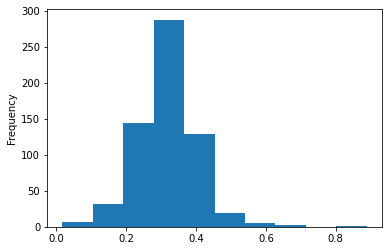

In [60]:
airport_delay_prob_df['DELAY_PROP'].plot.hist()

This matches our sanity check that the average of the overall data we have over a 36% delay proportion.

- **What is the difference between probablility and proportion?**

Our probability calculation is the likelihood that a flight from an origin airport will arrive late as a ratio to all observations (what **might** happen). When we look at it like that we are seeing the impact on the total number of delayed flights across the whole system, but our proportion for this dataset makes more intuitive sense. The proportion is the likelihood for an event to have occurred, and for this calculation we are looking only at the flights leaving an origin rather than all flights (what **has** happened). Our proportion gives us the percent of delayed arrivals in proportion to only the flights that left the origin.

### Question 4
---
- **What is the mean and std of late arrival times for both of these airports.**

The top and bottom proportions came from regional airports, so I am going to also bring in the national airports top and bottom for comparison.

In [61]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '14222']['ARRIVAL_DELAY'].describe()

count      9.000000
mean     100.000000
std      250.802213
min       -2.000000
25%        7.000000
50%       14.000000
75%       29.000000
max      767.000000
Name: ARRIVAL_DELAY, dtype: float64

In [62]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '15041']['ARRIVAL_DELAY'].describe()

count     60.000000
mean      -4.550000
std       34.300479
min      -28.000000
25%      -15.000000
50%       -9.000000
75%       -4.750000
max      232.000000
Name: ARRIVAL_DELAY, dtype: float64

Airport: 14222
- mean: 100.0
- std: 250.8
    
Airport: 15041
- mean: -4.6
- std: 34.3

In [63]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'GST']['ARRIVAL_DELAY'].describe()

count     76.000000
mean      21.763158
std       38.217577
min      -19.000000
25%       -2.250000
50%       10.500000
75%       28.750000
max      179.000000
Name: ARRIVAL_DELAY, dtype: float64

In [64]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'CNY']['ARRIVAL_DELAY'].describe()

count    205.000000
mean     -20.678049
std       12.548875
min      -48.000000
25%      -28.000000
50%      -23.000000
75%      -17.000000
max       63.000000
Name: ARRIVAL_DELAY, dtype: float64

- **Based on the mean and std information ONLY, which airport seems like a better choice?**

For our regional airports, or worst performing orgin had a mean of 100 and a std of 250.8 whereas our best performing origin had a mean of -4.55 and a std of 34.3.  This means that on average our best performing origin airport was early and our standard deviation was small compared to our other origin.  Just off of our mean and std values I would pick the origin with the average flight being early rather than late, and when combined with a tighter standard deviation it makes it an easy choice over the other option.

### Question 5
---
- **Use these two airports and compare their histograms of arrival delays with each other.**

<AxesSubplot:ylabel='Frequency'>

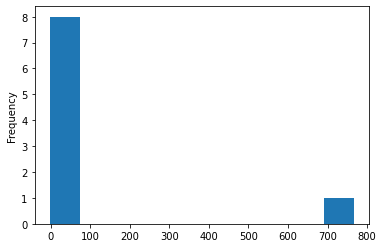

In [65]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '14222']['ARRIVAL_DELAY'].plot.hist()

<AxesSubplot:ylabel='Density'>

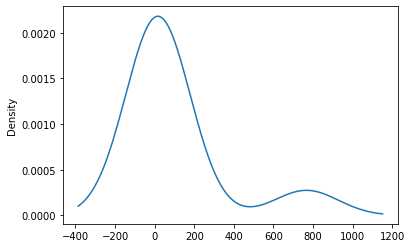

In [66]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '14222']['ARRIVAL_DELAY'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

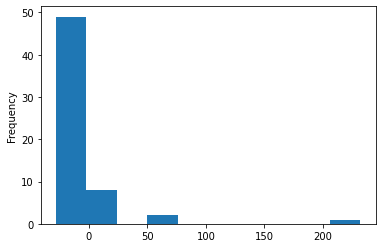

In [67]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '15041']['ARRIVAL_DELAY'].plot.hist()

<AxesSubplot:ylabel='Density'>

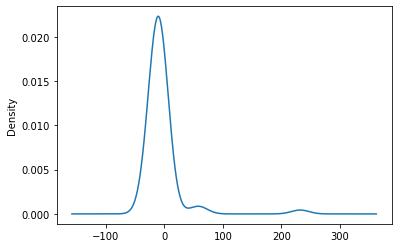

In [68]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '15041']['ARRIVAL_DELAY'].plot.kde()

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='Density'>

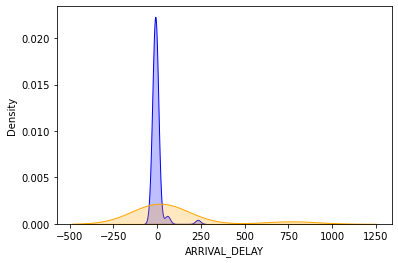

In [69]:
top = airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '15041']['ARRIVAL_DELAY']
bottom = airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == '14222']['ARRIVAL_DELAY']

sns.kdeplot(top, color='blue', shade='True')
sns.kdeplot(bottom, color='orange', shade='True')

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-28., -26., -26., -23., -23., -23., -22., -22., -20., -20., -18.,
         -18., -18., -17., -15., -1

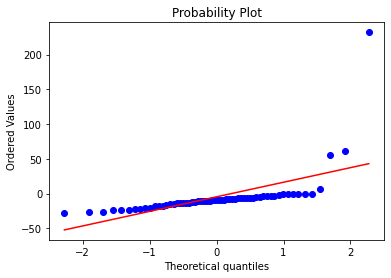

In [70]:
stats.probplot(top, plot=sns.mpl.pyplot)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([ -2.,   1.,   7.,   8.,  14.,  17.,  29.,  59., 767.])),
 (177.58503084407837, 99.99999999999999, 0.6452495555201387))

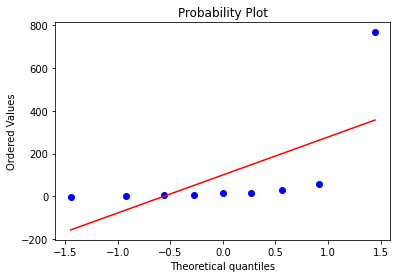

In [71]:
stats.probplot(bottom, plot=sns.mpl.pyplot)

<AxesSubplot:ylabel='Frequency'>

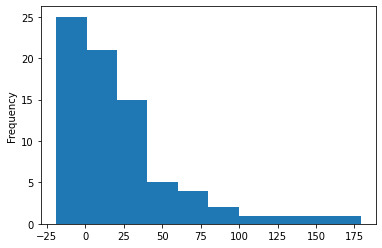

In [72]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'GST']['ARRIVAL_DELAY'].plot.hist()

<AxesSubplot:ylabel='Density'>

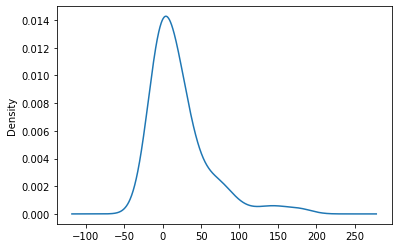

In [73]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'GST']['ARRIVAL_DELAY'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

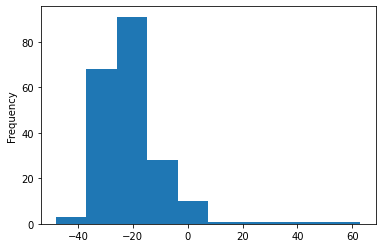

In [74]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'CNY']['ARRIVAL_DELAY'].plot.hist()

<AxesSubplot:ylabel='Density'>

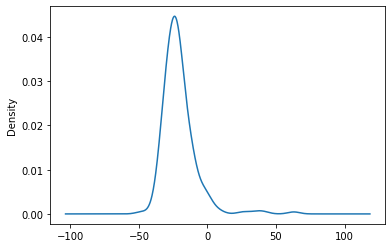

In [75]:
airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'CNY']['ARRIVAL_DELAY'].plot.kde()

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='Density'>

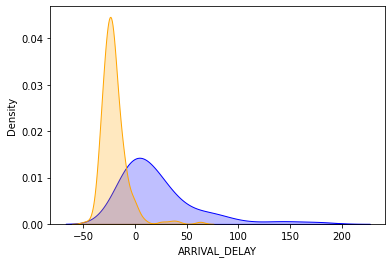

In [76]:
top = airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'GST']['ARRIVAL_DELAY']
bottom = airport_delay_df[airport_delay_df['ORIGIN_AIRPORT'] == 'CNY']['ARRIVAL_DELAY']

sns.kdeplot(top, color='blue', shade='True')
sns.kdeplot(bottom, color='orange', shade='True')

- **Which airport seems like you would have a better chance at arriving at your destination on time? Use the histograms to backup your conclusion!**

When looking at our histograms we can see the distribution, and counts of flights clustered around zero and then look at the counts of our outlier delays skewing right on our graphs. When looking at our composite kde graph we can see how tight the density of on time, early, and barely late flights are compared to our other plot that has a much lower peak centered on the wrong side of zero. Just looking at these graphs it is pretty aparent that we want to be at the airport that has more area under their curve (for kde) or the better total count for on-time arrivals (left of or equal to zero).

## V. Conclusion

After doing the analysis we can see that there is a difference between the best and worst performing airports when it comes to arrival delays, but that there is a large effect from outlier experiences that skew the data. We can see that the impact of one (or a few) very delayed flights causes a large effect on where an airport ranks. When this is translated to the national airports where there is significantly more traffic we do see that there is still a difference between the best and worst airports, so although the delays skew due to large delay times the count of delayed arrivals compared to on-time or early still matters.

Further analysis could be done on this dataset by looking at the types of delays, origin-destination pairs, and any of the other column details that we did not end up using for this arrival delay analysis. I was very interested to see that so many indivdual parts of a flight were measured to create this dataset, which makes a lot of sense since this industry survives on scheduling and optimization.